<a href="https://colab.research.google.com/github/girdharriya/Data-Analytics-Project/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ASSIGNMENT 2- DECISION TREE**

In [ ]:
!pip install pydataset


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 53.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939433 sha256=0156d95d3ea836e4f41b96c431a717aa806517a102168b96c81596f613a10333
  Stored in directory: /root/.cache/pip/wheels/6b/86/a7/f71cb84c7bff804d83e293615a20c0531234397b796aee2645
Successfully built pydataset


In [ ]:
from pydataset import data # For Datasets
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation

initiated datasets repo at: /root/.pydataset/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the processed/treated dataset
data=pd.read_csv('/content/drive/MyDrive/Sample data/Treated_dataset.csv')

In [ ]:
data.info


<bound method DataFrame.info of       gender      work_type Residence_type   smoking_status  gender_code  \
0       Male        Private          Urban           smokes          1.0   
1     Female        Private          Rural     never smoked          0.0   
2     Female       children          Rural          Unknown          0.0   
3       Male       children          Rural          Unknown          1.0   
4     Female        Private          Urban     never smoked          0.0   
...      ...            ...            ...              ...          ...   
3827    Male        Private          Rural     never smoked          1.0   
3828  Female  Self-employed          Urban          Unknown          0.0   
3829    Male        Private          Urban     never smoked          1.0   
3830    Male        Private          Rural           smokes          1.0   
3831  Female       Govt_job          Rural  formerly smoked          0.0   

      work_type_code  Residence_type_code  smoking_stat

In [ ]:
data.columns

Index(['gender', 'work_type', 'Residence_type', 'smoking_status',
       'gender_code', 'work_type_code', 'Residence_type_code',
       'smoking_status_code', 'id', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'avg_glucose_level', 'bmi', 'stroke', 'bmi_mmnorm'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               3832 non-null   object 
 1   work_type            3832 non-null   object 
 2   Residence_type       3832 non-null   object 
 3   smoking_status       3832 non-null   object 
 4   gender_code          3832 non-null   float64
 5   work_type_code       3832 non-null   float64
 6   Residence_type_code  3832 non-null   float64
 7   smoking_status_code  3832 non-null   float64
 8   id                   3832 non-null   float64
 9   age                  3832 non-null   float64
 10  hypertension         3832 non-null   float64
 11  heart_disease        3832 non-null   float64
 12  ever_married         3832 non-null   float64
 13  avg_glucose_level    3832 non-null   float64
 14  bmi                  3832 non-null   float64
 15  stroke               3832 non-null   f

In [ ]:
# Analysis Objective : Segment the occurence of stroke based on other independent factors

# Subset data based on Inputs & Output
data_inputs = data[['age', 'hypertension', 'heart_disease', 'ever_married' , 'work_type_code' , 'Residence_type_code' , 'avg_glucose_level' ,'bmi' ,'smoking_status_code']];data_inputs
data_output = data[['stroke']]; data_output

,stroke
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3827,0.0
3828,0.0
3829,0.0
3830,0.0


In [ ]:
data_inputs_names = data_inputs.columns; data_inputs_names
data_output_labels =data_output['stroke'].unique().astype(str); data_output_labels

array(['0.0', '1.0'], dtype='<U32')

In [ ]:
# Split the Data Subset into Training & Testing Sets
train_data_inputs, test_data_inputs, train_data_output, test_data_output = train_test_split(data_inputs, data_output, test_size=0.25, random_state=1234)

In [ ]:
#Additional libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
data_dtc = DecisionTreeClassifier(criterion='gini', random_state=None)
dtc_model = data_dtc.fit(data_inputs, data_output);dtc_model

DecisionTreeClassifier()

In [ ]:
Stroke_prediction = dtc_model.predict([[1,0,0,0,1,0,0,0,1]]); Stroke_prediction

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

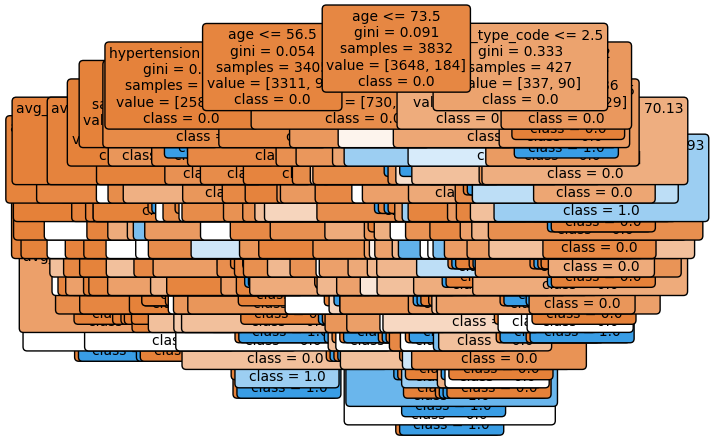

In [ ]:
data_prediction_dtc_plot = plot_tree(dtc_model, feature_names=data_inputs_names, class_names=data_output_labels, rounded=True, filled=True, fontsize=10)
plt.show()

In [ ]:
#Decision Tree : Model (Training Subset)
dtc = DecisionTreeClassifier(criterion='gini', random_state=1234) # Other Criteria : Entropy,  Log Loss
dtc_model = dtc.fit(train_data_inputs, train_data_output); dtc_model

DecisionTreeClassifier(random_state=1234)

In [ ]:
# Decision Tree : Model Rules
dtc_model_rules = export_text(dtc_model, feature_names = list(data_inputs_names)); print(dtc_model_rules)

|--- age <= 67.50
|   |--- age <= 56.50
|   |   |--- hypertension <= 0.50
|   |   |   |--- age <= 41.50
|   |   |   |   |--- avg_glucose_level <= 57.93
|   |   |   |   |   |--- avg_glucose_level <= 57.86
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- avg_glucose_level >  57.86
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- avg_glucose_level >  57.93
|   |   |   |   |   |--- smoking_status_code <= 2.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- smoking_status_code >  2.50
|   |   |   |   |   |   |--- avg_glucose_level <= 76.23
|   |   |   |   |   |   |   |--- avg_glucose_level <= 75.66
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- avg_glucose_level >  75.66
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- avg_glucose_level >  76.23
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- age >  41.50
|   |   |   |   |--- avg_glucose_level <= 74.13
|   |   |   |   |   

In [ ]:
dtc_imp_features = pd.DataFrame({'feature': data_inputs_names, 'importance': np.round(dtc_model.feature_importances_, 3)})
dtc_imp_features.sort_values('importance', ascending=False, inplace=True); dtc_imp_features


,feature,importance
7,bmi,0.286
6,avg_glucose_level,0.262
0,age,0.242
8,smoking_status_code,0.094
2,heart_disease,0.030
4,work_type_code,0.029
1,hypertension,0.024
5,Residence_type_code,0.017
3,ever_married,0.015


In [ ]:
# Decision Tree : Model Prediction (Training Subset)
dtc_model_predict = dtc_model.predict(train_data_inputs); dtc_model_predict

array([0., 0., 0., ..., 1., 0., 0.])

In [ ]:
# Decision Tree : Prediction (Testing Subset)
dtc_predict = dtc_model.predict(test_data_inputs); dtc_predict

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0.

In [ ]:
# Decision Tree : Model Evaluation (Training Subset)
dtc_model_conf_mat = pd.DataFrame(confusion_matrix(train_data_output, dtc_model_predict)); dtc_model_conf_mat
dtc_model_perf = classification_report(train_data_output, dtc_model_predict); print(dtc_model_perf)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2731
         1.0       1.00      1.00      1.00       143

    accuracy                           1.00      2874
   macro avg       1.00      1.00      1.00      2874
weighted avg       1.00      1.00      1.00      2874



In [ ]:
# Decision Tree : Prediction Evaluation (Testing Subset)
dtc_predict_conf_mat = pd.DataFrame(confusion_matrix(test_data_output, dtc_predict)); dtc_predict_conf_mat
dtc_predict_perf = classification_report(test_data_output, dtc_predict); print(dtc_predict_perf)


              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       917
         1.0       0.06      0.07      0.06        41

    accuracy                           0.91       958
   macro avg       0.51      0.51      0.51       958
weighted avg       0.92      0.91      0.91       958



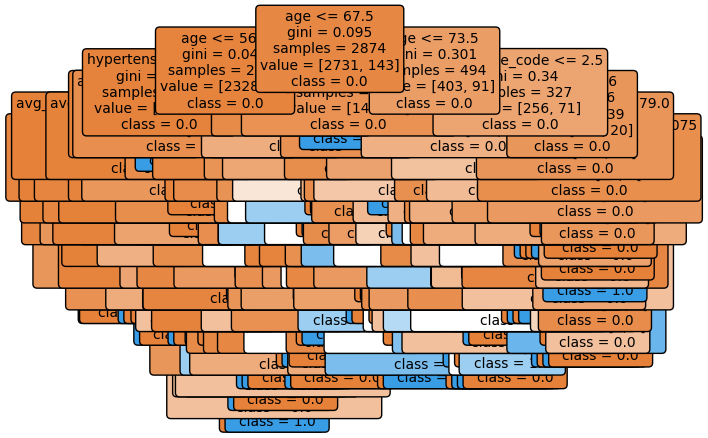

In [ ]:
# Decision Tree : Plot [Training Subset]
train_subset_dtc_plot = plot_tree(dtc_model, feature_names=data_inputs_names, class_names=data_output_labels, rounded=True, filled=True, fontsize=10)
plt.show()

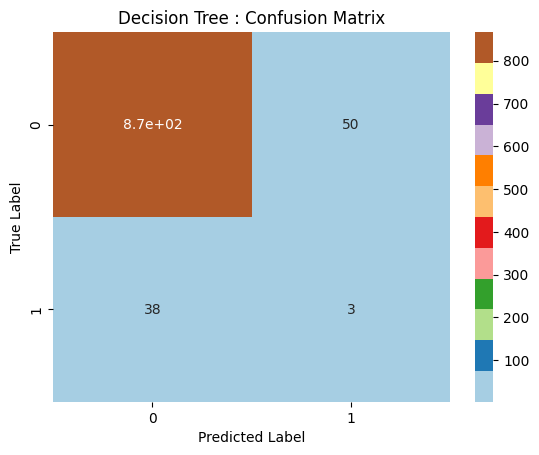

In [ ]:
ax = plt.axes()
sns.heatmap(dtc_predict_conf_mat, annot=True, cmap='Paired')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Decision Tree : Confusion Matrix')
plt.show()

#**Report**
**Objectives**

1.To know possibility of stroke based on other independent  factors like BMI, glucose level etc.

2.To know the overall accuracy of the model used for prediction.

3.To know the accuracy and precision the prediction of outcomes by the decision tree.

4.To know the relative importance of features that affect the prediction of occurence of stroke.

5.To know the accuracy of positive prediction for the occurence of the stroke in thhe patient.

**Insights**

1.BMI have the highest impact on the prediction of a stroke followed by patient glucose level and age.

2.Marriage status have the lowest importance in predicting the occurence of a storke in the patients.

3.On the basis of model evaluation ,it can be said that the prediction model is highly precise and accurate.

4.On the basis of prediction evaluation, the predictions are quite accurate when there is no stroke however the accuracy and precision of the predictions is very low when it comes to occurence of stroke. Hence, when there is prediction of a stroke it is not very likely that thepatient will suffer with a stroke.

5.Features other than the top three does not have much impact on the occurence of the stroke.

6.Further insights and prediction for a stroke can be made through the decision tree formed on the basis data by considering features of the particular patient.

**Managerial Implications**

1.It will help managers to make informed decisions and predictions based on actual data.

2.Informed Decision of managers will help them avoid risky decisions by predicting the outcomes of particular decision with the help of decision tree.

3.It will also help to allocate right resources at the right time by predicting the outcome.

4.It will help managers reduce time taken in decision making and will optimise the operation further.

5.It will help predict the occurance of the stroke with other independent factors